In [357]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
#PIL is Python Imaging Library
from PIL import Image
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import random
import cv2 
%matplotlib inline

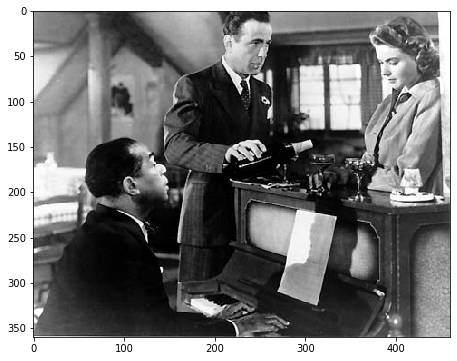

In [358]:
img = Image.open('casablanca.pgm')
plt.figure(figsize=(10,6))

plt.imshow(img,cmap = plt.cm.gray)

In [359]:
img.height,img.width

(360, 460)

In [360]:
# img_new = img.resize((750,750), Image.ANTIALIAS)
# print(img_new.width,img_new.height)
# img_new.save("dating_rsz.jpg") 

In [361]:
image_matrix = np.array(img)
image_matrix.shape

(360, 460)

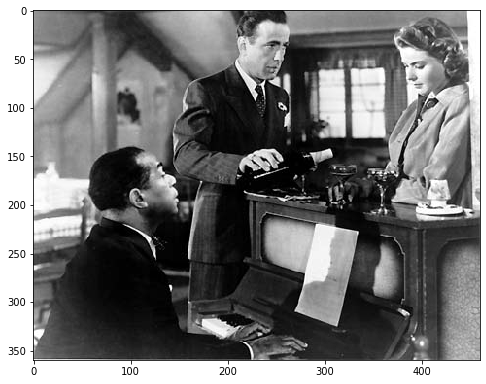

In [362]:
reconstructed_image = Image.fromarray(image_matrix)
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image,cmap = plt.cm.gray)

In [363]:
original_dimensions = image_matrix.shape
original_dimensions

(360, 460)

In [364]:
#Just for cross-checking things are the flattening the image
image_matrix[0,0],image_matrix[123,124],image_matrix[123,124]

(163, 129, 129)

In [365]:
pct_reduction = 0.10
reduced_pixel  = int( pct_reduction* original_dimensions[1])

#Applying PCA
pca = PCA(n_components=reduced_pixel)
pca.fit(image_matrix)

#Transforming the input matrix
X_transformed = pca.transform(image_matrix)
print("Original Input dimesnions {}".format(original_dimensions))
print("New Reduced dimensions {}".format(X_transformed.shape))

Original Input dimesnions (360, 460)
New Reduced dimensions (360, 46)


In [366]:
df_pca = pd.DataFrame(data = X_transformed,columns=list(range(X_transformed.shape[1])))



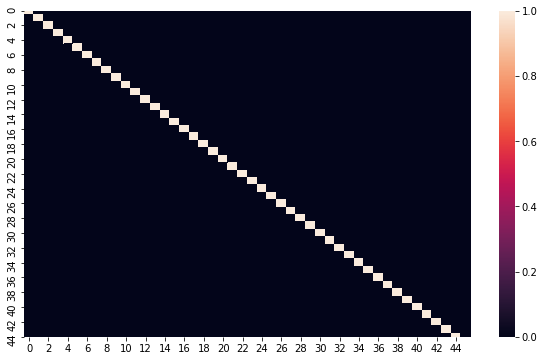

In [367]:
figure = plt.figure(figsize=(10,6))
corrMatrix = df_pca.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

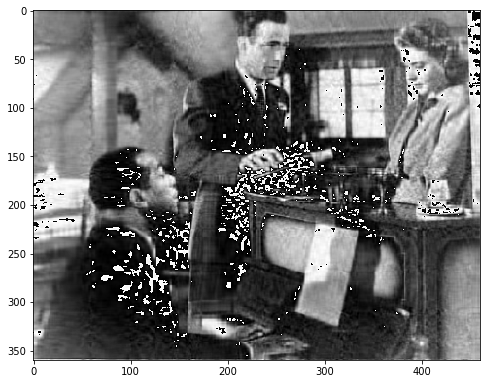

In [368]:
reconstructed_matrix = pca.inverse_transform(X_transformed)
reconstructed_image_pca = Image.fromarray(np.uint8(reconstructed_matrix))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_pca,cmap = plt.cm.gray)

In [369]:
def my_rmse(np_arr1,np_arr2):
    dim = np_arr1.shape
    tot_loss = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            tot_loss += math.pow((np_arr1[i,j] - np_arr2[i,j]),2)
    return round(math.sqrt(tot_loss/(dim[0]* dim[1]*1.0)),2)

In [370]:
error_pca = my_rmse(image_matrix,reconstructed_matrix)
error_pca

11.84

In [371]:
X_org = image_matrix.copy()
sc = StandardScaler()
X = sc.fit_transform(X_org)

In [372]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = reduced_pixel  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(img.width,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='linear')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(img.width, activation=None)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

In [373]:
#Encoder
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [374]:
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [375]:
autoencoder.fit(X, X,
                epochs=500,
                batch_size=16,
                shuffle=True)

Epoch 1/500
360/360 [==============================] - 0s 230us/step - loss: 0.8772
Epoch 2/500
360/360 [==============================] - 0s 54us/step - loss: 0.4555
Epoch 3/500
360/360 [==============================] - 0s 55us/step - loss: 0.3322
Epoch 4/500
360/360 [==============================] - 0s 57us/step - loss: 0.2792
Epoch 5/500
360/360 [==============================] - 0s 54us/step - loss: 0.2436
Epoch 6/500
360/360 [==============================] - 0s 56us/step - loss: 0.2177
Epoch 7/500
360/360 [==============================] - 0s 53us/step - loss: 0.1982
Epoch 8/500
360/360 [==============================] - 0s 57us/step - loss: 0.1828
Epoch 9/500
360/360 [==============================] - 0s 59us/step - loss: 0.1693
Epoch 10/500
360/360 [==============================] - 0s 58us/step - loss: 0.1577
Epoch 11/500
360/360 [==============================] - 0s 53us/step - loss: 0.1485
Epoch 12/500
360/360 [==============================] - 0s 66us/step - loss: 0.1402


360/360 [==============================] - 0s 48us/step - loss: 0.0429
Epoch 99/500
360/360 [==============================] - 0s 50us/step - loss: 0.0428
Epoch 100/500
360/360 [==============================] - 0s 48us/step - loss: 0.0427
Epoch 101/500
360/360 [==============================] - 0s 48us/step - loss: 0.0427
Epoch 102/500
360/360 [==============================] - 0s 49us/step - loss: 0.0423
Epoch 103/500
360/360 [==============================] - 0s 48us/step - loss: 0.0424
Epoch 104/500
360/360 [==============================] - 0s 50us/step - loss: 0.0428
Epoch 105/500
360/360 [==============================] - 0s 48us/step - loss: 0.0419
Epoch 106/500
360/360 [==============================] - 0s 51us/step - loss: 0.0419
Epoch 107/500
360/360 [==============================] - 0s 52us/step - loss: 0.0418
Epoch 108/500
360/360 [==============================] - 0s 51us/step - loss: 0.0416
Epoch 109/500
360/360 [==============================] - 0s 51us/step - loss: 0.

360/360 [==============================] - 0s 48us/step - loss: 0.0375
Epoch 195/500
360/360 [==============================] - 0s 47us/step - loss: 0.0372
Epoch 196/500
360/360 [==============================] - 0s 47us/step - loss: 0.0374
Epoch 197/500
360/360 [==============================] - 0s 47us/step - loss: 0.0375
Epoch 198/500
360/360 [==============================] - 0s 48us/step - loss: 0.0370
Epoch 199/500
360/360 [==============================] - 0s 47us/step - loss: 0.0371
Epoch 200/500
360/360 [==============================] - 0s 47us/step - loss: 0.0370
Epoch 201/500
360/360 [==============================] - 0s 48us/step - loss: 0.0373
Epoch 202/500
360/360 [==============================] - 0s 50us/step - loss: 0.0376
Epoch 203/500
360/360 [==============================] - 0s 49us/step - loss: 0.0371
Epoch 204/500
360/360 [==============================] - 0s 51us/step - loss: 0.0372
Epoch 205/500
360/360 [==============================] - 0s 53us/step - loss: 0

360/360 [==============================] - 0s 49us/step - loss: 0.0371
Epoch 291/500
360/360 [==============================] - 0s 47us/step - loss: 0.0362
Epoch 292/500
360/360 [==============================] - 0s 49us/step - loss: 0.0362
Epoch 293/500
360/360 [==============================] - 0s 48us/step - loss: 0.0369
Epoch 294/500
360/360 [==============================] - 0s 49us/step - loss: 0.0366
Epoch 295/500
360/360 [==============================] - 0s 48us/step - loss: 0.0365
Epoch 296/500
360/360 [==============================] - 0s 48us/step - loss: 0.0362
Epoch 297/500
360/360 [==============================] - 0s 48us/step - loss: 0.0363
Epoch 298/500
360/360 [==============================] - 0s 48us/step - loss: 0.0370
Epoch 299/500
360/360 [==============================] - 0s 48us/step - loss: 0.0361
Epoch 300/500
360/360 [==============================] - 0s 48us/step - loss: 0.0364
Epoch 301/500
360/360 [==============================] - 0s 53us/step - loss: 0

360/360 [==============================] - 0s 49us/step - loss: 0.0363
Epoch 387/500
360/360 [==============================] - 0s 48us/step - loss: 0.0364
Epoch 388/500
360/360 [==============================] - 0s 49us/step - loss: 0.0360
Epoch 389/500
360/360 [==============================] - 0s 49us/step - loss: 0.0360
Epoch 390/500
360/360 [==============================] - 0s 49us/step - loss: 0.0361
Epoch 391/500
360/360 [==============================] - 0s 48us/step - loss: 0.0359
Epoch 392/500
360/360 [==============================] - 0s 50us/step - loss: 0.0363
Epoch 393/500
360/360 [==============================] - 0s 47us/step - loss: 0.0358
Epoch 394/500
360/360 [==============================] - 0s 48us/step - loss: 0.0360
Epoch 395/500
360/360 [==============================] - 0s 48us/step - loss: 0.0358
Epoch 396/500
360/360 [==============================] - 0s 48us/step - loss: 0.0361
Epoch 397/500
360/360 [==============================] - 0s 50us/step - loss: 0

360/360 [==============================] - 0s 49us/step - loss: 0.0363
Epoch 483/500
360/360 [==============================] - 0s 48us/step - loss: 0.0366
Epoch 484/500
360/360 [==============================] - 0s 48us/step - loss: 0.0357
Epoch 485/500
360/360 [==============================] - 0s 46us/step - loss: 0.0358
Epoch 486/500
360/360 [==============================] - 0s 45us/step - loss: 0.0364
Epoch 487/500
360/360 [==============================] - 0s 45us/step - loss: 0.0358
Epoch 488/500
360/360 [==============================] - 0s 48us/step - loss: 0.0361
Epoch 489/500
360/360 [==============================] - 0s 48us/step - loss: 0.0359
Epoch 490/500
360/360 [==============================] - 0s 49us/step - loss: 0.0359
Epoch 491/500
360/360 [==============================] - 0s 49us/step - loss: 0.0359
Epoch 492/500
360/360 [==============================] - 0s 48us/step - loss: 0.0361
Epoch 493/500
360/360 [==============================] - 0s 49us/step - loss: 0

In [376]:
autoencoder.summary()

Model: "model_50"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_28 (InputLayer)        (None, 460)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 46)                21206     
_________________________________________________________________
dense_50 (Dense)             (None, 460)               21620     
Total params: 42,826
Trainable params: 42,826
Non-trainable params: 0
_________________________________________________________________


In [377]:
res = autoencoder.predict(X)

In [378]:
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(encoded_imgs)

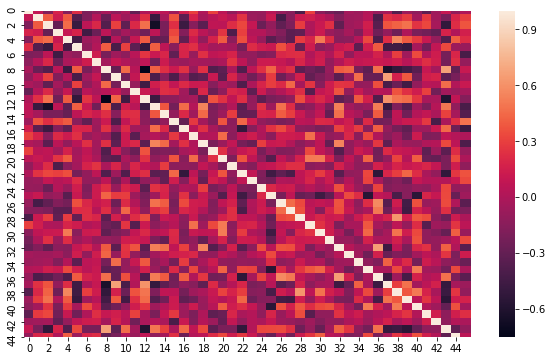

In [379]:
df_ae = pd.DataFrame(data = encoded_imgs,columns=list(range(encoded_imgs.shape[1])))
figure = plt.figure(figsize=(10,6))
corrMatrix = df_ae.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

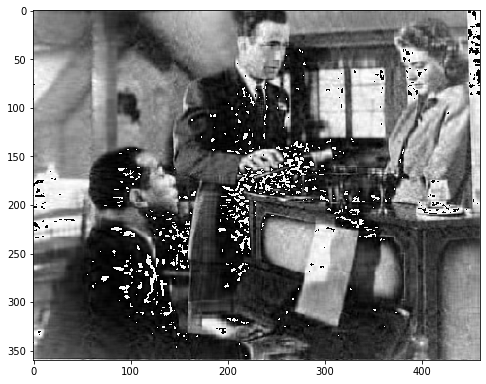

In [380]:
X_decoded_ae = sc.inverse_transform(decoded_imgs)

reconstructed_image_ae = Image.fromarray(np.uint8(X_decoded_ae))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_ae,cmap = plt.cm.gray)



In [381]:
error_ae = my_rmse(image_matrix,X_decoded_ae)
error_ae

12.09

In [382]:
input_img = Input(shape=(img.width,))
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(reduced_pixel, activation='relu')(encoded1)
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(img.width, activation=None)(decoded1)

In [383]:
autoencoder = Model(input_img, decoded2)
autoencoder.compile(optimizer='adadelta', loss='mean_squared_error')

In [384]:
autoencoder.summary()

Model: "model_53"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 460)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 128)               59008     
_________________________________________________________________
dense_52 (Dense)             (None, 46)                5934      
_________________________________________________________________
dense_53 (Dense)             (None, 128)               6016      
_________________________________________________________________
dense_54 (Dense)             (None, 460)               59340     
Total params: 130,298
Trainable params: 130,298
Non-trainable params: 0
_________________________________________________________________


In [385]:
autoencoder.fit(X,X,
                epochs=500,
                batch_size=16,
                shuffle=True)

Epoch 1/500
360/360 [==============================] - 0s 379us/step - loss: 0.9185
Epoch 2/500
360/360 [==============================] - 0s 72us/step - loss: 0.5625
Epoch 3/500
360/360 [==============================] - 0s 69us/step - loss: 0.3703
Epoch 4/500
360/360 [==============================] - 0s 73us/step - loss: 0.3045
Epoch 5/500
360/360 [==============================] - 0s 72us/step - loss: 0.2697
Epoch 6/500
360/360 [==============================] - 0s 63us/step - loss: 0.2454
Epoch 7/500
360/360 [==============================] - 0s 58us/step - loss: 0.2240
Epoch 8/500
360/360 [==============================] - 0s 61us/step - loss: 0.2084
Epoch 9/500
360/360 [==============================] - 0s 59us/step - loss: 0.1938
Epoch 10/500
360/360 [==============================] - 0s 65us/step - loss: 0.1832
Epoch 11/500
360/360 [==============================] - 0s 59us/step - loss: 0.1729
Epoch 12/500
360/360 [==============================] - 0s 62us/step - loss: 0.1653


360/360 [==============================] - 0s 62us/step - loss: 0.0494
Epoch 99/500
360/360 [==============================] - 0s 69us/step - loss: 0.0500
Epoch 100/500
360/360 [==============================] - 0s 67us/step - loss: 0.0499
Epoch 101/500
360/360 [==============================] - 0s 66us/step - loss: 0.0482
Epoch 102/500
360/360 [==============================] - 0s 66us/step - loss: 0.0493
Epoch 103/500
360/360 [==============================] - 0s 65us/step - loss: 0.0485
Epoch 104/500
360/360 [==============================] - 0s 67us/step - loss: 0.0490
Epoch 105/500
360/360 [==============================] - 0s 66us/step - loss: 0.0473
Epoch 106/500
360/360 [==============================] - 0s 67us/step - loss: 0.0513
Epoch 107/500
360/360 [==============================] - 0s 67us/step - loss: 0.0464
Epoch 108/500
360/360 [==============================] - 0s 66us/step - loss: 0.0457
Epoch 109/500
360/360 [==============================] - 0s 64us/step - loss: 0.

360/360 [==============================] - 0s 66us/step - loss: 0.0321
Epoch 195/500
360/360 [==============================] - 0s 62us/step - loss: 0.0314
Epoch 196/500
360/360 [==============================] - 0s 62us/step - loss: 0.0319
Epoch 197/500
360/360 [==============================] - 0s 59us/step - loss: 0.0310
Epoch 198/500
360/360 [==============================] - 0s 59us/step - loss: 0.0317
Epoch 199/500
360/360 [==============================] - 0s 59us/step - loss: 0.0327
Epoch 200/500
360/360 [==============================] - 0s 66us/step - loss: 0.0320
Epoch 201/500
360/360 [==============================] - 0s 67us/step - loss: 0.0309
Epoch 202/500
360/360 [==============================] - 0s 67us/step - loss: 0.0315
Epoch 203/500
360/360 [==============================] - 0s 68us/step - loss: 0.0309
Epoch 204/500
360/360 [==============================] - 0s 67us/step - loss: 0.0326
Epoch 205/500
360/360 [==============================] - 0s 66us/step - loss: 0

360/360 [==============================] - 0s 70us/step - loss: 0.0250
Epoch 291/500
360/360 [==============================] - 0s 67us/step - loss: 0.0245
Epoch 292/500
360/360 [==============================] - 0s 68us/step - loss: 0.0247
Epoch 293/500
360/360 [==============================] - 0s 68us/step - loss: 0.0258
Epoch 294/500
360/360 [==============================] - 0s 68us/step - loss: 0.0249
Epoch 295/500
360/360 [==============================] - 0s 67us/step - loss: 0.0238
Epoch 296/500
360/360 [==============================] - 0s 72us/step - loss: 0.0244
Epoch 297/500
360/360 [==============================] - 0s 68us/step - loss: 0.0243
Epoch 298/500
360/360 [==============================] - 0s 69us/step - loss: 0.0237
Epoch 299/500
360/360 [==============================] - 0s 68us/step - loss: 0.0245
Epoch 300/500
360/360 [==============================] - 0s 66us/step - loss: 0.0246
Epoch 301/500
360/360 [==============================] - 0s 66us/step - loss: 0

360/360 [==============================] - 0s 58us/step - loss: 0.0216
Epoch 387/500
360/360 [==============================] - 0s 58us/step - loss: 0.0209
Epoch 388/500
360/360 [==============================] - 0s 57us/step - loss: 0.0207
Epoch 389/500
360/360 [==============================] - 0s 57us/step - loss: 0.0209
Epoch 390/500
360/360 [==============================] - 0s 58us/step - loss: 0.0210
Epoch 391/500
360/360 [==============================] - 0s 59us/step - loss: 0.0208
Epoch 392/500
360/360 [==============================] - 0s 62us/step - loss: 0.0199
Epoch 393/500
360/360 [==============================] - 0s 61us/step - loss: 0.0209
Epoch 394/500
360/360 [==============================] - 0s 60us/step - loss: 0.0201
Epoch 395/500
360/360 [==============================] - 0s 58us/step - loss: 0.0206
Epoch 396/500
360/360 [==============================] - 0s 69us/step - loss: 0.0205
Epoch 397/500
360/360 [==============================] - 0s 68us/step - loss: 0

360/360 [==============================] - 0s 63us/step - loss: 0.0177
Epoch 483/500
360/360 [==============================] - 0s 67us/step - loss: 0.0186
Epoch 484/500
360/360 [==============================] - 0s 78us/step - loss: 0.0181
Epoch 485/500
360/360 [==============================] - 0s 77us/step - loss: 0.0180
Epoch 486/500
360/360 [==============================] - 0s 70us/step - loss: 0.0182
Epoch 487/500
360/360 [==============================] - 0s 72us/step - loss: 0.0176
Epoch 488/500
360/360 [==============================] - 0s 76us/step - loss: 0.0201
Epoch 489/500
360/360 [==============================] - 0s 70us/step - loss: 0.0178
Epoch 490/500
360/360 [==============================] - 0s 68us/step - loss: 0.0186
Epoch 491/500
360/360 [==============================] - 0s 65us/step - loss: 0.0173
Epoch 492/500
360/360 [==============================] - 0s 59us/step - loss: 0.0175
Epoch 493/500
360/360 [==============================] - 0s 81us/step - loss: 0

In [386]:
#Encoder
encoder = Model(input_img, encoded2)
#Decoder
decoder = Model(input_img, decoded2)

In [387]:
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(X)

In [388]:
encoded_imgs[0].shape

(46,)

In [389]:
decoded_imgs[0].shape

(460,)

In [390]:
X_decoded_deep_ae = sc.inverse_transform(decoded_imgs)

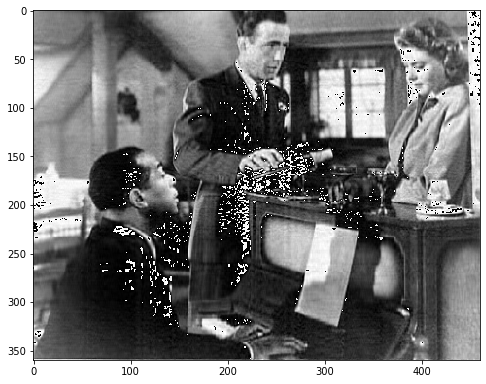

In [391]:
reconstructed_image_deep_ae = Image.fromarray(np.uint8(X_decoded_deep_ae))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_deep_ae,cmap = plt.cm.gray)

In [392]:
error_dae = my_rmse(image_matrix,X_decoded_deep_ae)
error_dae

8.57

In [393]:
gain = (error_pca - error_dae)/error_pca * 100
print("Gain percent {}".format(round(gain,2)))

Gain percent 27.62
